In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(rstudioapi, tidyverse, ggbeeswarm)

Loading required package: pacman



# Walkthrough

We will be looking at a familiar data set: the similarity data set from Winter and Matlock.

Let's remind us on whats going on in the data.

In [2]:
# Load our data set
sim <- read_csv("winter_matlock_2013_similarity.csv")

head(sim)

Rows: 364 Columns: 3

── Column specification ───────────────────────────────────────────────────────
Delimiter: ","
chr (2): Sem, Phon
dbl (1): Distance


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Sem,Phon,Distance
<chr>,<chr>,<dbl>
Different,Similar,76
Different,Different,110
Similar,Similar,214
Different,Different,41
Different,Different,78
Different,Similar,87


Participants drew fictional villages on a map solely based on what they have read about the village (relative to another village). 
The researchers measured the `Distance` of the drawn villages.
Village descriptions and names were either similar or different with respect to their phonological form (`Phon`) or their semantic properties (`Sem`).

## A simple linear model
Let's predict `Distance` based on `Phon` and `Sem`.

In [3]:
# linear model
xlm <- lm(Distance ~ Phon + Sem,
          data = sim)

summary(xlm)


Call:
lm(formula = Distance ~ Phon + Sem, data = sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.350 -26.453  -4.167  19.536 138.833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   79.556      3.631  21.912   <2e-16 ***
PhonSimilar    5.795      4.181   1.386   0.1667    
SemSimilar   -10.184      4.181  -2.435   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.81 on 360 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02148,	Adjusted R-squared:  0.01604 
F-statistic: 3.951 on 2 and 360 DF,  p-value: 0.02008


We get a bunch of information. 
Now that we have learned about uncertainty and significance testing, we can interpret the whole model output. 
The model estimates that phonologically similar villages are drawn 5.795 units further away than phonologically different villages (the intercept). 
This difference is statistically not significant (p = 0.1667). 
So if the null hypothesis is true, i.e. phonological similarity has no impact on distance, than the obtained t-value (t = 1.386) or more extreme t-values are too likely for us to reject the null. 
Moreover, the model estimates that semantically similar villages are drawn 10.184 units closer than semantically different villages (the intercept). 
This difference is statistically significant (p = 0.0154). 
So if the null hypothesis is true, i.e. semantically similarity has no impact on distance, than the obtained t-value (t = -2.435) or more extreme t-values are unlikely enough for us to reject the null. 

## Extract predictions
Let's extract the models predictions for all combinations of `Phon` and `Sem`.

In [4]:
# predict
## new df for prediction
newpreds <- tibble(expand.grid(Phon = unique(sim$Phon),
                               Sem = unique(sim$Sem)))

## predict based on model
sim_preds <- predict(xlm, 
                     newpreds,
                     interval = 'confidence')

sim_predictions <- cbind(newpreds, sim_preds)
sim_predictions

,Phon,Sem,fit,lwr,upr
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,Similar,Different,85.35043,78.39001,92.31084
2,Different,Different,79.55565,72.41572,86.69558
3,Similar,Similar,75.16676,68.02683,82.30669
4,Different,Similar,69.37199,62.12524,76.61874


## Plot predictions
Now we plot the model estimates and their 95% confidence intervals.

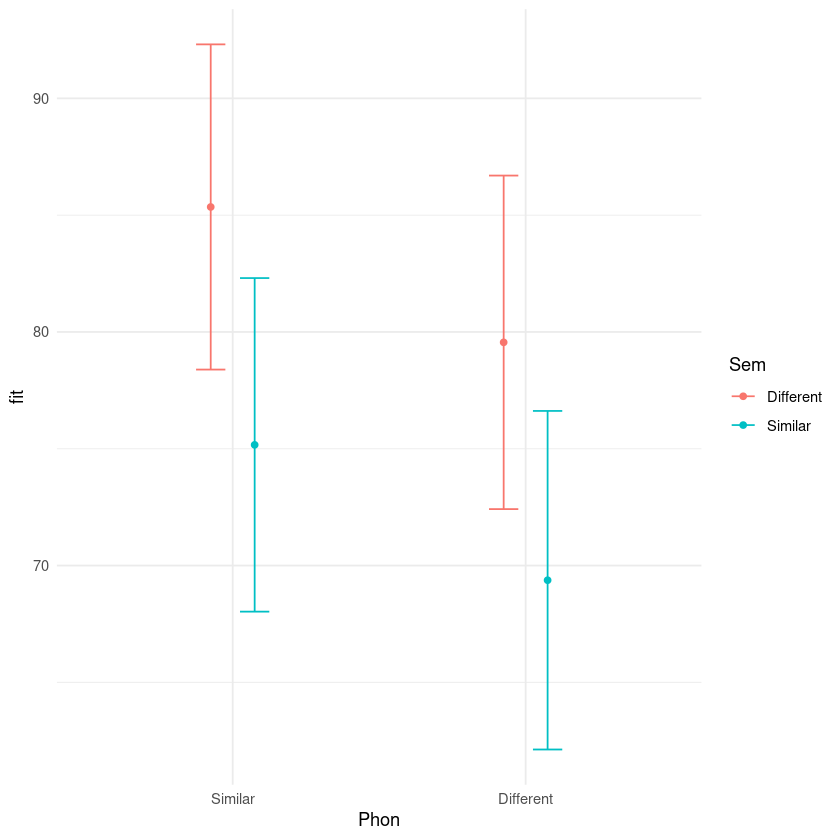

In [5]:
sim_predictions %>%
  ggplot(aes(x = Phon, 
             y = fit,
             color = Sem)) +
  geom_point(position = position_dodge(0.3)) +
  geom_errorbar(aes(ymin = lwr, 
                    ymax = upr),
                position = position_dodge(0.3),
                width = 0.2) +
  theme_minimal()

# Exercises
## Excercise 1

We now go back to the nettle data set introduced at early stages during the class.

In [6]:
# Load our data set
nettle <- read_csv("nettle_1999_climate.csv")
head(nettle)

Rows: 74 Columns: 5

── Column specification ───────────────────────────────────────────────────────
Delimiter: ","
chr (1): Country
dbl (4): Population, Area, MGS, Langs


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Country,Population,Area,MGS,Langs
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,4.41,6.38,6.60,18
Angola,4.01,6.10,6.22,42
Australia,4.24,6.89,6.00,234
Bangladesh,5.07,5.16,7.40,37
Benin,3.69,5.05,7.14,52
Bolivia,3.88,6.04,6.92,38


### (a) 
Run a linear regression that predicts `Population` based on standardized `Area`.
I standardized the predictor `Area` for you.

In [7]:
# Perhaps it should be (Area - mean(Area))/sd(Area)?
nettle <- nettle %>% 
  mutate(Area_c = (mean(Area) - Area) / sd(Area))

In [8]:
nettle

Country,Population,Area,MGS,Langs,Area_c
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,4.41,6.38,6.60,18,-1.3784622
Angola,4.01,6.10,6.22,42,-0.8721382
Australia,4.24,6.89,6.00,234,-2.3006951
Bangladesh,5.07,5.16,7.40,37,0.8276638
Benin,3.69,5.05,7.14,52,1.0265768
Bolivia,3.88,6.04,6.92,38,-0.7636402
Botswana,3.13,5.76,4.60,27,-0.2573162
Brazil,5.19,6.93,9.71,209,-2.3730271
Burkina Faso,3.97,5.44,5.17,75,0.3213398


In [9]:
model = lm(Population ~ Area_c, nettle)
summary(model)


Call:
lm(formula = Population ~ Area_c, data = nettle)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52203 -0.33093  0.05303  0.32404  1.39342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.99162    0.06481  61.593  < 2e-16 ***
Area_c      -0.38064    0.06525  -5.834 1.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5575 on 72 degrees of freedom
Multiple R-squared:  0.321,	Adjusted R-squared:  0.3115 
F-statistic: 34.03 on 1 and 72 DF,  p-value: 1.429e-07


### (b) 
Interpret the model estimates and the p-values

The p-value is so low that the null hypothesis is much more likely to be true. 



### (c)
Extract model predictions for `Area_c` and plot a scatter plot with the regression line and the respective 95% confidence interval.

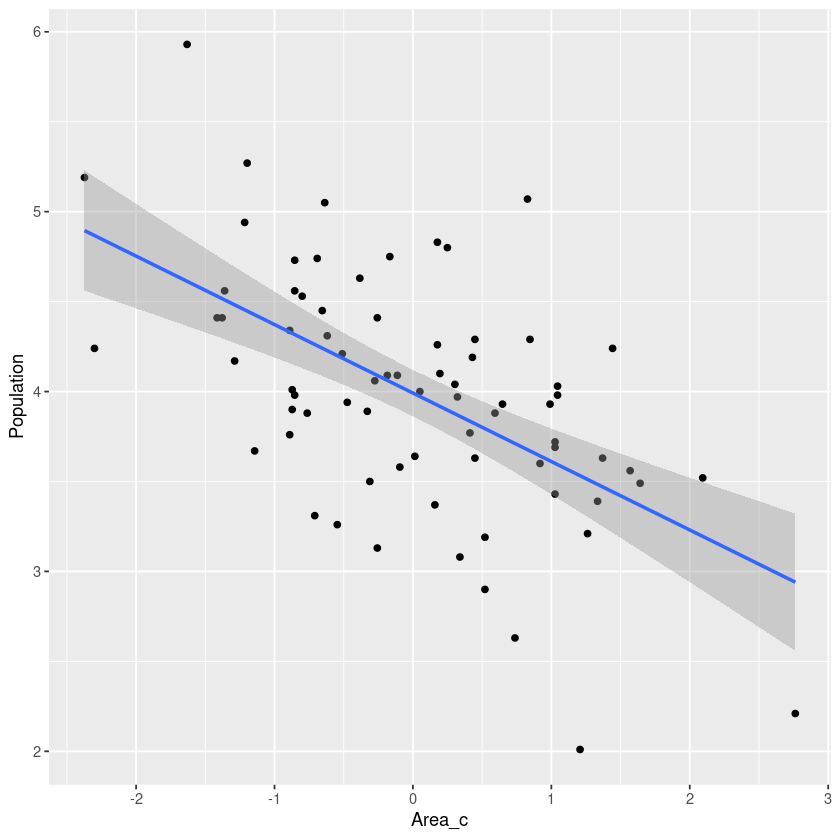

In [10]:
ggplot(nettle, aes(Area_c, Population)) + 
  geom_point() +
  geom_smooth(method='lm', formula=y~x)

## Homework
### (a)
Take the similarity data from the walkthrough.
Run a model that predicts `Distance` based on standardized `Phon`, `Sem` and their interaction.

In [25]:
# Before we run any models, we must make sure that our dataset is clean
sim = na.omit(sim)
head(sim)

Sem,Phon,Distance
<chr>,<chr>,<dbl>
Different,Similar,76
Different,Different,110
Similar,Similar,214
Different,Different,41
Different,Different,78
Different,Similar,87


In [11]:
# Using this predicate, we make "one-hot" vectors that can be averaged in order
# to apply scaling. 
sem_similar = sim$Sem == "Similar"
phon_similar = sim$Phon == "Similar"
summary(lm(Distance ~ phon_similar + sem_similar, sim))


Call:
lm(formula = Distance ~ phon_similar + sem_similar, data = sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.350 -26.453  -4.167  19.536 138.833 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        79.556      3.631  21.912   <2e-16 ***
phon_similarTRUE    5.795      4.181   1.386   0.1667    
sem_similarTRUE   -10.184      4.181  -2.435   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.81 on 360 degrees of freedom
Multiple R-squared:  0.02148,	Adjusted R-squared:  0.01604 
F-statistic: 3.951 on 2 and 360 DF,  p-value: 0.02008


In [12]:
summary(lm(Distance ~ sem_similar, sim))


Call:
lm(formula = Distance ~ sem_similar, data = sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.561 -27.448  -4.561  18.439 141.665 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       82.561      2.915  28.321   <2e-16 ***
sem_similarTRUE  -10.226      4.187  -2.443   0.0151 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.87 on 361 degrees of freedom
Multiple R-squared:  0.01626,	Adjusted R-squared:  0.01353 
F-statistic: 5.966 on 1 and 361 DF,  p-value: 0.01506


In [13]:
standardize = function(x) {
    # Using the standard scaling formula
    return (x - mean(x)) / sd(x)
}

phon_similar_c = standardize(phon_similar)
sem_similar_c = standardize(sem_similar)
summary(lm(Distance ~ phon_similar_c + sem_similar_c, sim))


Call:
lm(formula = Distance ~ phon_similar_c + sem_similar_c, data = sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.350 -26.453  -4.167  19.536 138.833 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      77.603      2.090  37.136   <2e-16 ***
phon_similar_c    5.795      4.181   1.386   0.1667    
sem_similar_c   -10.184      4.181  -2.435   0.0154 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.81 on 360 degrees of freedom
Multiple R-squared:  0.02148,	Adjusted R-squared:  0.01604 
F-statistic: 3.951 on 2 and 360 DF,  p-value: 0.02008


Now using interaction:

In [14]:
# For the interaction of a categorical variable, we multiply the 
# first categorical variable with the other
interaction = sem_similar * phon_similar
interaction_c = standardize(interaction)

model_scaled = lm(Distance ~ phon_similar_c + sem_similar_c + interaction_c, sim)
summary(model_scaled)


Call:
lm(formula = Distance ~ phon_similar_c + sem_similar_c + interaction_c, 
    data = sim)

Residuals:
   Min     1Q Median     3Q    Max 
-80.42 -26.42  -4.40  19.60 139.99 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      77.603      2.092  37.100   <2e-16 ***
phon_similar_c    8.023      5.833   1.375    0.170    
sem_similar_c    -7.819      6.010  -1.301    0.194    
interaction_c    -4.593      8.375  -0.548    0.584    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.85 on 359 degrees of freedom
Multiple R-squared:  0.0223,	Adjusted R-squared:  0.01413 
F-statistic: 2.729 on 3 and 359 DF,  p-value: 0.04386


### (b)
Interpret the model estimates and the p-values

We have already looked at the coefficients from the walkthrough:

"We get a bunch of information. 
Now that we have learned about uncertainty and significance testing, we can interpret the whole model output. 
The model estimates that phonologically similar villages are drawn 5.795 units further away than phonologically different villages (the intercept). 
This difference is statistically not significant (p = 0.1667). 
So if the null hypothesis is true, i.e. phonological similarity has no impact on distance, then the obtained t-value (t = 1.386) or more extreme t-values are too likely for us to reject the null. 
Moreover, the model estimates that semantically similar villages are drawn 10.184 units closer than semantically different villages (the intercept). 
This difference is statistically significant (p = 0.0154). 
So if the null hypothesis is true, i.e. semantically similarity has no impact on distance, then the obtained t-value (t = -2.435) or more extreme t-values are unlikely enough for us to reject the null. "

So there is not much more to be said about phonological and semantic similarity.

The interaction coefficient shows that when the villages are both semantically similar and phonologically similar, the estimator predicts the distance to be 4.59 units closer. However, the difference is not statistically significant (p = 0.58). t-values equal, or more extreme than 0.548 are too likely to occur to reject the null hypothesis.

### (c)
Compare your results to the results by Winter & Matlock (2013) - Experiment 2a (see PDF in Files). Do you get the same results as them? If not why? 

The p-values for the two categorical predictors were identical to the the first model, excluding the interactions. 
For the second run, when including the interactions as the third variable, the p-value was also identical

The f-statistics are derived categorically, and as we can see, we can find (almost) the same numbers when running a separate regression model for each categorical predictor. It might be because they look at the f-statistic from row 1 through 359

In [23]:
summary(lm(Distance ~ phon_similar, sim))


Call:
lm(formula = Distance ~ phon_similar, data = sim)

Residuals:
   Min     1Q Median     3Q    Max 
-74.45 -26.45  -3.58  19.42 133.55 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        74.580      3.022  24.682   <2e-16 ***
phon_similarTRUE    5.870      4.210   1.394    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.09 on 361 degrees of freedom
Multiple R-squared:  0.005356,	Adjusted R-squared:  0.002601 
F-statistic: 1.944 on 1 and 361 DF,  p-value: 0.1641


In [22]:
summary(lm(Distance ~ sem_similar, sim))


Call:
lm(formula = Distance ~ sem_similar, data = sim)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.561 -27.448  -4.561  18.439 141.665 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       82.561      2.915  28.321   <2e-16 ***
sem_similarTRUE  -10.226      4.187  -2.443   0.0151 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.87 on 361 degrees of freedom
Multiple R-squared:  0.01626,	Adjusted R-squared:  0.01353 
F-statistic: 5.966 on 1 and 361 DF,  p-value: 0.01506


### (Bonus I)
Extract model predictions for all combinations of Phon and Sem and plot the results and the respective 95% confidence intervals.

### (BONUS II)
Superimpose the model estimates on top of the actual data, plotted as points. 

In [17]:
# YOUR CODE HERE